In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from cdlib import algorithms
import dynetx as dn
import calendar
from cdlib import algorithms, evaluation
from cdlib import NodeClustering
import statistics
import pathlib
import matplotlib.pyplot as plt
import os
import pathlib 

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'karateclub', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


Utility

In [2]:
#Utility
def drop_weights(G):
    '''Drop the weights from a networkx weighted graph.'''
    for node, edges in nx.to_dict_of_dicts(G).items():
        for edge, attrs in edges.items():
            attrs.pop('weight', None)

def similarita(voti_dep1, voti_dep2):
    uguali = np.sum((voti_dep1 == voti_dep2) & (voti_dep1 != 0) ) # volte in cui hanno votato la stessa  ed erano entrambi presenti

    diversi = np.sum((voti_dep1 != voti_dep2) & (voti_dep1 != 0) & (voti_dep2 != 0) ) # volte in cui hanno votato diversamente ed erano entrambi presenti
    
    if uguali == 0:
        sim = 0
    else:
        sim = uguali/(uguali+diversi)
    return sim


#works only with dataframes like ours
def alignment_parties(df):
    col = df.columns[4:].to_list()
    col.append('Partito')
    parties_alignment = pd.DataFrame()
    party = df.groupby('Partito')
    for i in party: # party[0] nome partito, party[1] dataframe
        a = np.apply_along_axis(statistics.mode, axis = 0, arr= i[1])[4:].tolist()
        a.append(i[0])
        parties_alignment = pd.concat([parties_alignment, pd.DataFrame(a).T], axis = 0)

    parties_alignment.columns = col
    return parties_alignment


In [8]:
leg = ['xvii', 'xviii']
filenames = []
years_months = [] 

for l in leg:
    dataset_folder = pathlib.Path(os.path.dirname(os.getcwd())+'\\data_collection\\data\\Data_monthly\\'+l+'-months')
    file_list = list(dataset_folder.iterdir())
    for i, path in enumerate(file_list):
        if path.suffix == ".csv":
            filenames.append(file_list[i])
            years_months.append(str(file_list[i])[-11:-4].replace('-',''))
            
    print(len(filenames))

64
117


In [9]:
apd = []
j = 0
for f in filenames:
    df = pd.read_csv(f)

    if df.shape[1] > 10 and df.shape[0] != 0:
        alignment = alignment_parties(df)
        discipline = []
        for index, row in df.iterrows():
            p = alignment[alignment['Partito'] == row['Partito']]
            c = 0
            for i in p.drop('Partito', axis = 1).columns:
                if row[i] == np.float64(p[i][0]):
                    c+=1
            
            discipline.append(c/(len(p.columns) - 1))

        df['discipline'] = discipline

        apd.append(np.mean(df['discipline']))
    
    else:
        years_months.remove(str(f)[-11:-4].replace('-',''))

In [12]:
all = []
for i in range(len(apd)):
    all.append([apd[i], years_months[i]])

In [18]:
all[0][1].replace('_', ' ').split()

['2013', '10']

In [42]:
def cmp(a,b):
    y_a, m_a = a[1].replace('_', ' ').split()
    y_b, m_b = b[1].replace('_', ' ').split()
    if int(y_a) < int(y_b): return -1
    if int(y_b) < int(y_a): return -1
    return -1 if int(m_a) < int(m_b) else 1

In [36]:
def InsertionSort(coll, cmp):
    L = list(coll[:])
    for j in range(1, len(L)):
        key = L[j]
        #insert the key in an already sorted collection
        i = j - 1
        while i >= 0 and cmp(L[i], key) > 0:
            L[i+1] = L[i]
            i = i-1

        L[i+1] = key
    return L

In [43]:
L = InsertionSort(all, cmp)

In [45]:
L

[[0.7371541501976285, '2013_5'],
 [0.7609195402298851, '2013_6'],
 [0.8498773359368155, '2013_7'],
 [0.8323658694246929, '2013_8'],
 [0.8262881338638915, '2013_9'],
 [0.8154388714733541, '2013_10'],
 [0.7364862009213473, '2013_11'],
 [0.8194519029962068, '2013_12'],
 [0.7713375677364598, '2014_1'],
 [0.8101010101010102, '2014_2'],
 [0.7830243069969097, '2014_3'],
 [0.7400940977099918, '2014_4'],
 [0.7044902809608693, '2014_5'],
 [0.8187836730550299, '2014_6'],
 [0.8315845067687744, '2014_7'],
 [0.7755192643094975, '2014_8'],
 [0.7378302672420319, '2014_9'],
 [0.8393454371715241, '2014_10'],
 [0.823261690623047, '2014_11'],
 [0.8400590310096506, '2014_12'],
 [0.7600531933673049, '2015_1'],
 [0.9013397992370012, '2015_2'],
 [0.8247306491304258, '2015_3'],
 [0.8257598150015648, '2015_4'],
 [0.9042674759024498, '2015_5'],
 [0.7413224199516266, '2015_6'],
 [0.8841984126984126, '2015_7'],
 [0.6682933900270583, '2015_8'],
 [0.8911206046664475, '2015_9'],
 [0.8102950870194241, '2015_10'],
 [0.

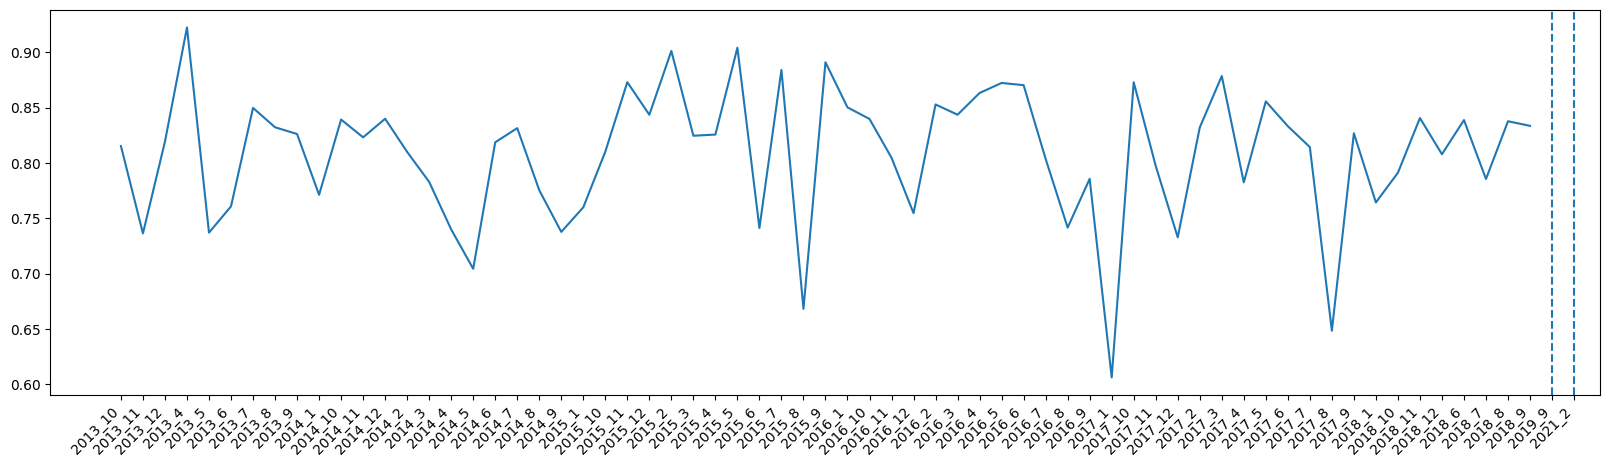

In [7]:
fig = plt.figure(figsize = (20, 5))
plt.plot(years_months[:65], apd[:65]) # 65: per la xviii legislatura

plt.xticks(rotation=45, ha='right')
plt.axvline(x='2019_9', linestyle = '--')
plt.axvline(x='2021_2', linestyle = '--')